In [8]:
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

1. How punctual/consistent are the trains in each borough? (Maybe use the divisions?) -Jahaira
> I can even check if the number of passengers shows any corr with arrival times

Variables I will use :

> [OBJECT] division -- The A Division (numbered subway lines and S 42nd) and B Division (lettered subway lines) [text]
> [FLOAT] additional_platform_time -- The AVERAGE estimated additional time in minutes (above scheduled time) customers wait for their train, reported each month and on each line.


> [F] total_apt -- The TOTAL NUMBER of estimated additional time in minutes (above scheduled time) customers wait for their train, reported each month and on each line.
> [F] num_passengers -- Total number of estimated passengers reported each month and on each line.

In [ ]:
# Importing the dataset
mta = pd.read_csv("../data/MTA_Subway_Customer_Metrics_2020-2024.csv")

In [ ]:
# Displaying the first few rows of dataset
mta.head()

,month,division,line,period,num_passengers,additional platform time,additional train time,total_apt,total_att,over_five_mins,over_five_mins_perc,customer journey time performance
0,2024-12-01,A DIVISION,1,offpeak,5034590.0,0.962958,0.738045,4848099.5,3715755.0,643165.40,0.127749,0.872251
1,2024-12-01,A DIVISION,1,peak,5552918.0,1.020276,0.662142,5665509.0,3676820.8,624175.44,0.112405,0.887595
2,2024-12-01,A DIVISION,2,offpeak,3078700.2,1.425670,0.726788,4389210.5,2237562.2,555590.80,0.180463,0.819537
3,2024-12-01,A DIVISION,2,peak,3672602.5,1.147720,0.448690,4215117.5,1647861.6,483096.44,0.131541,0.868459
4,2024-12-01,A DIVISION,3,offpeak,2344247.5,0.984354,0.456582,2307569.0,1070340.6,293768.30,0.125315,0.874685


In [ ]:
# Checking the data types of the columns for EDA
mta.dtypes

month                                 object
division                              object
line                                  object
period                                object
num_passengers                       float64
additional platform time             float64
additional train time                float64
total_apt                            float64
total_att                            float64
over_five_mins                       float64
over_five_mins_perc                  float64
customer journey time performance    float64
dtype: object

In [16]:
# Statistics of dataset and selected rows for EDA
mta.describe()

,num_passengers,additional platform time,additional train time,total_apt,total_att,over_five_mins,over_five_mins_perc,customer journey time performance
count,2.856000e+03,2856.000000,2856.000000,2.856000e+03,2.856000e+03,2.856000e+03,2856.000000,2856.000000
mean,2.188061e+06,1.251518,0.276823,2.903727e+06,9.339990e+05,3.404776e+05,0.145785,0.854215
std,1.450171e+06,0.454368,0.482434,2.065435e+06,1.258208e+06,2.435442e+05,0.059847,0.059847
min,3.017300e+03,-0.431496,-2.213688,-7.396448e+03,-3.060992e+06,4.630000e+01,0.000112,0.682048
25%,1.091265e+06,0.962920,0.024190,1.284948e+06,5.169300e+03,1.451870e+05,0.107274,0.808143
50%,2.049147e+06,1.223633,0.339261,2.804886e+06,6.263841e+05,3.103827e+05,0.146694,0.853306
75%,3.184311e+06,1.540595,0.598394,4.261219e+06,1.605923e+06,5.129739e+05,0.191857,0.892726
max,8.923406e+06,3.506892,1.584780,1.462646e+07,7.841808e+06,1.274929e+06,0.317952,0.999888


In [15]:
# Checking for null 
mta.isnull().sum()

month                                0
division                             0
line                                 0
period                               0
num_passengers                       0
additional platform time             0
additional train time                0
total_apt                            0
total_att                            0
over_five_mins                       0
over_five_mins_perc                  0
customer journey time performance    0
dtype: int64

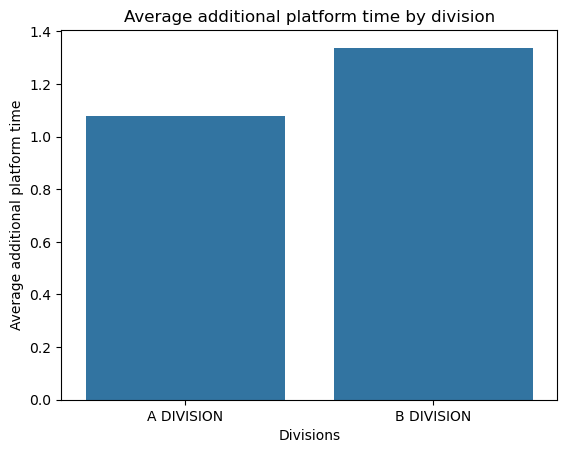

In [ ]:
#grouping by divisions and calculating the mean of additional platform time
division_delays = mta.groupby("division")["additional platform time"].mean().reset_index()

sns.barplot( data = division_delays, x = "division", y = "additional platform time")
plt.title("Average additional platform time by division")
plt.xlabel("Divisions")
plt.ylabel("Average additional platform time")  
plt.show()
